In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("credit_card_transactions.csv")

In [2]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [3]:
df.rename(columns={"trans_date_trans_time":"timestamp","amt":"amount"},inplace=True)
df.drop(["Unnamed: 0","first","last","cc_num","street","zip","lat","long","merch_lat","merch_long","trans_num","unix_time","merch_zipcode"],axis=1,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   timestamp  1296675 non-null  object 
 1   merchant   1296675 non-null  object 
 2   category   1296675 non-null  object 
 3   amount     1296675 non-null  float64
 4   gender     1296675 non-null  object 
 5   city       1296675 non-null  object 
 6   state      1296675 non-null  object 
 7   city_pop   1296675 non-null  int64  
 8   job        1296675 non-null  object 
 9   dob        1296675 non-null  object 
 10  is_fraud   1296675 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 108.8+ MB


In [5]:
for i in df:
    print(i,": ",len(df[i].value_counts()))

timestamp :  1274791
merchant :  693
category :  14
amount :  52928
gender :  2
city :  894
state :  51
city_pop :  879
job :  494
dob :  968
is_fraud :  2


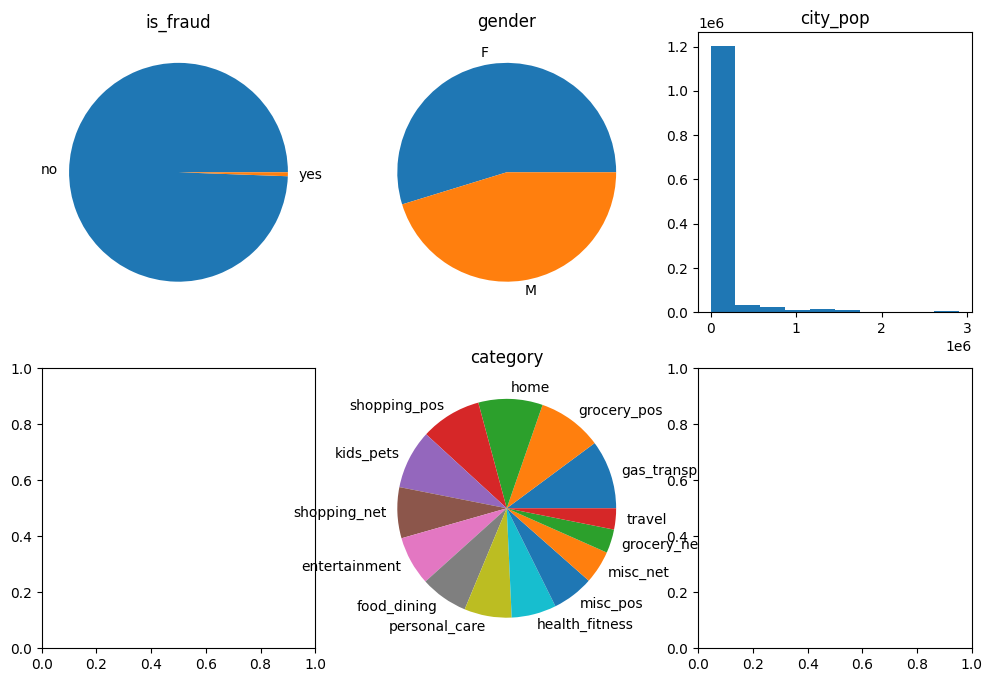

In [6]:
_,axes = plt.subplots(2,3,figsize=(12,8))

axes[0,0].pie(df.is_fraud.value_counts(),labels=["no","yes"])
axes[0,0].set_title("is_fraud")

axes[0,1].pie(df.gender.value_counts(),labels=["F","M"])
axes[0,1].set_title("gender")

axes[0,2].hist(df.city_pop)
axes[0,2].set_title("city_pop")

axes[1,1].pie(df.category.value_counts(),labels=df.category.value_counts().index)
axes[1,1].set_title("category")

plt.show()

### **Cleaning feature:** *timestamp*

In [7]:
df.timestamp=pd.to_datetime(df.timestamp)

df["year"] = df.timestamp.dt.year
df["month"] = df.timestamp.dt.month
df["day"] = df.timestamp.dt.day
df["day_name"] = df.timestamp.dt.day_name()
df["hour"] = df.timestamp.dt.hour

df.drop("timestamp",inplace=True,axis=1)

### **Cleaning feature:** *merchant*

In [8]:
count=0
for i in df.merchant.value_counts().index:
    if i[:5]!="fraud":
        count+=1
print(count)
df.merchant = df.merchant.str[6:]

#print(df.merchant.value_counts())
#decided to drop it since the unique values are too high for analysis
df.drop("merchant",inplace=True, axis=1)

0


### **Cleaning feature:** *job*

In [9]:
words = dict()
for text in df["job"]:
    for word in text.split(" "):
        word = word.lower()
        if word in words.keys():
            words[word] = words[word]+1
        else:
            words[word.replace(".","").replace(",","")] = 1
words = {key:value for key, value in sorted(words.items(), 
                                            key=lambda words: words[1],
                                            reverse = True)}

In [10]:
def lifting_cat_to_upper_hierarchy(text):
    for role in words:
        if role in text.lower() and role not in ["as","and","sub","a","it"]:
            return role
df["job"]=df["job"].apply(lifting_cat_to_upper_hierarchy)

#pd.set_option('display.max_rows', 10)
df.job.value_counts()

job
research          45755
education         41854
public            26116
chief             23081
consultant        22761
                  ...  
hydrogeologist      485
person               12
homeopath            11
solicitor            11
house                 7
Name: count, Length: 243, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
cols = ["gender","day_name"]
for col in cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [12]:
df.info()
for i in df:
    print(i,": ",len(df[i].value_counts()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   category  1296675 non-null  object 
 1   amount    1296675 non-null  float64
 2   gender    1296675 non-null  int64  
 3   city      1296675 non-null  object 
 4   state     1296675 non-null  object 
 5   city_pop  1296675 non-null  int64  
 6   job       1289974 non-null  object 
 7   dob       1296675 non-null  object 
 8   is_fraud  1296675 non-null  int64  
 9   year      1296675 non-null  int32  
 10  month     1296675 non-null  int32  
 11  day       1296675 non-null  int32  
 12  day_name  1296675 non-null  int64  
 13  hour      1296675 non-null  int32  
dtypes: float64(1), int32(4), int64(4), object(5)
memory usage: 118.7+ MB
category :  14
amount :  52928
gender :  2
city :  894
state :  51
city_pop :  879
job :  243
dob :  968
is_fraud :  2
year :  2
month :  12
day :  31
day_na

In [13]:
df = pd.get_dummies(df,columns=["category","state"],drop_first=True,prefix=["cat_","state_"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 75 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   amount               1296675 non-null  float64
 1   gender               1296675 non-null  int64  
 2   city                 1296675 non-null  object 
 3   city_pop             1296675 non-null  int64  
 4   job                  1289974 non-null  object 
 5   dob                  1296675 non-null  object 
 6   is_fraud             1296675 non-null  int64  
 7   year                 1296675 non-null  int32  
 8   month                1296675 non-null  int32  
 9   day                  1296675 non-null  int32  
 10  day_name             1296675 non-null  int64  
 11  hour                 1296675 non-null  int32  
 12  cat__food_dining     1296675 non-null  bool   
 13  cat__gas_transport   1296675 non-null  bool   
 14  cat__grocery_net     1296675 non-null  bool   
 15

In [15]:
df_old= df
df = df.drop(["city","job","dob"],axis=1)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
x=df.drop("is_fraud",axis=1)
y=df["is_fraud"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Accuracy: ",accuracy_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall score: ",recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))

Accuracy:  0.9935424662534736
Precision:  0.0
Recall score:  0.0
F1 score:  0.0


In [19]:
df.corr()

,amount,gender,city_pop,is_fraud,year,month,day,day_name,hour,cat__food_dining,...,state__SD,state__TN,state__TX,state__UT,state__VA,state__VT,state__WA,state__WI,state__WV,state__WY
amount,1.000000,0.001034,0.005818,0.219404,0.000842,-0.001748,0.000629,0.000301,-0.022811,-0.033102,...,0.000176,0.003271,0.002333,-0.003389,0.000355,0.007011,0.002601,-0.001357,0.000420,0.004148
gender,0.001034,1.000000,-0.028649,0.007642,-0.000654,-0.000215,-0.000206,0.001873,-0.037835,0.010173,...,-0.014903,0.017952,-0.035415,-0.031376,0.043803,0.013077,-0.078891,0.054782,-0.043700,-0.007330
city_pop,0.005818,-0.028649,1.000000,0.002136,-0.001673,0.000137,0.000159,-0.002148,0.020381,0.005798,...,-0.028384,0.004275,0.185717,-0.024873,-0.024732,-0.027240,-0.028684,-0.019089,-0.039433,-0.032166
is_fraud,0.219404,0.007642,0.002136,1.000000,0.003004,-0.012409,0.003848,0.002158,0.013799,-0.015025,...,0.000279,0.003377,-0.002741,-0.000105,0.001964,0.000416,-0.001148,-0.000478,-0.000198,-0.000155
year,0.000842,-0.000654,-0.001673,0.003004,1.000000,-0.464879,-0.045759,0.030186,-0.000811,-0.001510,...,0.002163,0.001466,-0.000039,-0.001225,-0.000477,0.000135,0.000832,0.000443,-0.000685,-0.000670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
state__VT,0.007011,0.013077,-0.027240,0.000416,0.000135,-0.000794,0.000644,-0.001891,0.006129,0.002571,...,-0.009375,-0.011211,-0.026889,-0.008729,-0.014538,1.000000,-0.011647,-0.014568,-0.013606,-0.011770
state__WA,0.002601,-0.078891,-0.028684,-0.001148,0.000832,0.000339,0.000171,0.000770,0.016041,-0.000121,...,-0.011921,-0.014257,-0.034194,-0.011100,-0.018488,-0.011647,1.000000,-0.018526,-0.017302,-0.014968
state__WI,-0.001357,0.054782,-0.019089,-0.000478,0.000443,0.001050,-0.000872,-0.001019,-0.002560,0.002217,...,-0.014912,-0.017833,-0.042772,-0.013885,-0.023126,-0.014568,-0.018526,1.000000,-0.021643,-0.018723
state__WV,0.000420,-0.043700,-0.039433,-0.000198,-0.000685,-0.000269,0.001894,0.001085,0.000747,-0.004152,...,-0.013927,-0.016655,-0.039947,-0.012968,-0.021598,-0.013606,-0.017302,-0.021643,1.000000,-0.017486
